In [14]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import TensorDataset
from torch.utils.data import DataLoader

x_train = torch.FloatTensor([[73,80,75],[93,88,93],[89,91,90],[96,98,100],[73,66,70]])
y_train = torch.FloatTensor([[152],[185],[180],[196],[142]])

In [15]:
dataset = TensorDataset(x_train,y_train)
dataloader = DataLoader(dataset,batch_size = 2,shuffle = True)

In [16]:
model = nn.Linear(3,1)
optimizer = torch.optim.SGD(model.parameters(),lr = 1e-5)

In [17]:
nb_epochs = 2000

for epoch in range(nb_epochs + 1):
    for batch_idx,samples in enumerate(dataloader):
        
        x_train,y_train = samples
        prediction = model(x_train)
        cost = F.mse_loss(prediction,y_train)
        
        optimizer.zero_grad()
        cost.backward()
        optimizer.step()
        if epoch % 100 == 0:
            print('Epoch {:4d} / {} Batch {} / {} Cost : {:.6f}'.format(epoch,nb_epochs,batch_idx + 1,len(dataloader),cost.item()))

Epoch    0 / 2000 Batch 1 / 3 Cost : 46074.484375
Epoch    0 / 2000 Batch 2 / 3 Cost : 23601.056641
Epoch    0 / 2000 Batch 3 / 3 Cost : 3418.139648
Epoch  100 / 2000 Batch 1 / 3 Cost : 1.325953
Epoch  100 / 2000 Batch 2 / 3 Cost : 0.575670
Epoch  100 / 2000 Batch 3 / 3 Cost : 1.106612
Epoch  200 / 2000 Batch 1 / 3 Cost : 0.273624
Epoch  200 / 2000 Batch 2 / 3 Cost : 0.499249
Epoch  200 / 2000 Batch 3 / 3 Cost : 2.396222
Epoch  300 / 2000 Batch 1 / 3 Cost : 0.300151
Epoch  300 / 2000 Batch 2 / 3 Cost : 1.150077
Epoch  300 / 2000 Batch 3 / 3 Cost : 1.475178
Epoch  400 / 2000 Batch 1 / 3 Cost : 0.266802
Epoch  400 / 2000 Batch 2 / 3 Cost : 0.503259
Epoch  400 / 2000 Batch 3 / 3 Cost : 2.307399
Epoch  500 / 2000 Batch 1 / 3 Cost : 1.389635
Epoch  500 / 2000 Batch 2 / 3 Cost : 0.849732
Epoch  500 / 2000 Batch 3 / 3 Cost : 0.451355
Epoch  600 / 2000 Batch 1 / 3 Cost : 0.035345
Epoch  600 / 2000 Batch 2 / 3 Cost : 0.953261
Epoch  600 / 2000 Batch 3 / 3 Cost : 2.361814
Epoch  700 / 2000 Batch

In [18]:
new_var = torch.FloatTensor([[73,80,75]])

pred_y = model(new_var)

print(pred_y)

tensor([[151.2692]], grad_fn=<AddmmBackward>)


In [19]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

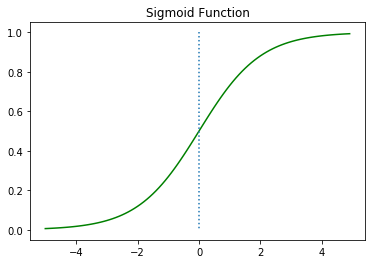

In [22]:
x = np.arange(-5.0,5.0,0.1)
y = sigmoid(x)

plt.plot(x,y,'g')
plt.plot([0,0],[1.0,0.0],':')
plt.title('Sigmoid Function')
plt.show()

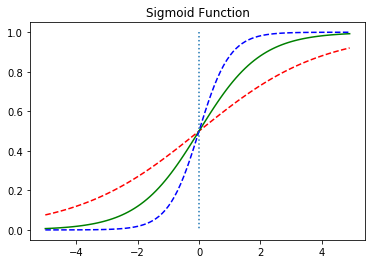

In [24]:
x = np.arange(-5.0,5.0,0.1)
y1 = sigmoid(0.5 * x)
y2 = sigmoid(x)
y3 = sigmoid(2 * x)

plt.plot(x,y1,'r',linestyle = '--')
plt.plot(x,y2,'g')
plt.plot(x,y3,'b',linestyle = '--')
plt.plot([0,0],[1.0,0.0],':')
plt.title('Sigmoid Function')
plt.show()

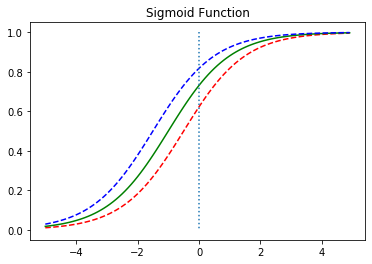

In [26]:
x = np.arange(-5.0,5.0,0.1)
y1 = sigmoid(x + 0.5)
y2 = sigmoid(x + 1)
y3 = sigmoid(x + 1.5)

plt.plot(x,y1,'r',linestyle = '--')
plt.plot(x,y2,'g')
plt.plot(x,y3,'b',linestyle = '--')
plt.plot([0,0],[1.0,0.0],':')
plt.title('Sigmoid Function')
plt.show()

In [27]:
x_data = [[1,2],[2,3],[3,1],[4,3],[5,3],[6,2]]
y_data = [[0],[0],[0],[1],[1],[1]]
x_train = torch.FloatTensor(x_data)
y_train = torch.FloatTensor(y_data)

In [29]:
w = torch.zeros((2,1), requires_grad = True)
b = torch.zeros(1,requires_grad = True)

hypothesis = 1 / (1 + torch.exp(-(x_train.matmul(w) + b)))

In [30]:
print(hypothesis)

tensor([[0.5000],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.5000]], grad_fn=<MulBackward0>)


In [31]:
hypothesis = torch.sigmoid(x_train.matmul(w) + b)
print(hypothesis)

tensor([[0.5000],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.5000]], grad_fn=<SigmoidBackward>)


In [32]:
losses = -(y_train * torch.log(hypothesis) + (1-y_train) * torch.log(1 - hypothesis))
print(losses)

tensor([[0.6931],
        [0.6931],
        [0.6931],
        [0.6931],
        [0.6931],
        [0.6931]], grad_fn=<NegBackward>)


In [33]:
cost = losses.mean()
print(cost)

tensor(0.6931, grad_fn=<MeanBackward0>)


In [34]:
F.binary_cross_entropy(hypothesis,y_train)

tensor(0.6931, grad_fn=<BinaryCrossEntropyBackward>)

In [37]:
x_data = [[1,2],[2,3],[3,1],[4,3],[5,3],[6,2]]
y_data = [[0],[0],[0],[1],[1],[1]]
x_train = torch.FloatTensor(x_data)
y_train = torch.FloatTensor(y_data)

w = torch.zeros((2,1), requires_grad = True)
b = torch.zeros(1,requires_grad = True)

optimizer = torch.optim.SGD([w,b],lr = 1)

nb_epochs = 1000

for epoch in range(nb_epochs + 1):
    hypothesis = torch.sigmoid(x_train.matmul(w) + b)
    cost = -(y_train * torch.log(hypothesis) + (1-y_train) * torch.log(1-hypothesis)).mean()

    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    if epoch % 100 == 0:
            print('Epoch {:4d} / {} Cost : {:.6f}'.format(epoch,nb_epochs,cost.item()))

Epoch    0 / 1000 Cost : 0.693147
Epoch  100 / 1000 Cost : 0.134722
Epoch  200 / 1000 Cost : 0.080643
Epoch  300 / 1000 Cost : 0.057900
Epoch  400 / 1000 Cost : 0.045300
Epoch  500 / 1000 Cost : 0.037261
Epoch  600 / 1000 Cost : 0.031673
Epoch  700 / 1000 Cost : 0.027556
Epoch  800 / 1000 Cost : 0.024394
Epoch  900 / 1000 Cost : 0.021888
Epoch 1000 / 1000 Cost : 0.019852


In [38]:
hypothesis = torch.sigmoid(x_train.matmul(w) + b)
print(hypothesis)

tensor([[2.7648e-04],
        [3.1608e-02],
        [3.8977e-02],
        [9.5622e-01],
        [9.9823e-01],
        [9.9969e-01]], grad_fn=<SigmoidBackward>)


In [39]:
prediction = hypothesis >= torch.FloatTensor([0.5])
print(prediction)

tensor([[False],
        [False],
        [False],
        [ True],
        [ True],
        [ True]])


In [40]:
print(w)
print(b)

tensor([[3.2530],
        [1.5179]], requires_grad=True)
tensor([-14.4819], requires_grad=True)
